In [1]:
# Standard module imports
import numpy as np
import scipy.stats as stats
import pandas as pd
import sys
%matplotlib inline

# Useful directories
gh_dir = '/Users/ttshimiz/Github/'
sed_fit_dir = gh_dir + 'bat-agn-sed-fitting/'
casey_dir = sed_fit_dir + 'analysis/casey_bayes_results/'
data_dir = gh_dir + 'bat-data/'

In [2]:
# Setup the figures
style='paper'
execfile('/Users/ttshimiz/Dropbox/Research/figure_setup.py')

In [3]:
# Upload the info for the BAT AGN (i.e. AGN type, luminosity distance, redshift, etc)
bat_info = pd.read_csv(data_dir+'bat_info.csv', index_col=0)

bat_flux = pd.read_csv(data_dir+'bat_bat_flux.csv', index_col=0)
bat_flux['bat_flux_err_low'] = bat_flux['BAT_flux'] - bat_flux['BAT_flux_90_low']
bat_flux['bat_flux_err_high'] = bat_flux['BAT_flux_90_high'] - bat_flux['BAT_flux']
bat_flux['lbat'] = np.log10(4*np.pi*(bat_info['Dist_[Mpc]']*10**6*3.09e18)**2*bat_flux['BAT_flux']*10**(-12))

# Upload the IR photometry
bat_herschel = pd.read_csv(data_dir+'bat_herschel.csv', index_col=0)
bat_wise = pd.read_csv(data_dir+'bat_wise.csv', index_col=0)

In [4]:
# Remove the radio loud sources and Mrk 3
# Remove 'bad' sources
radio_loud_sources = np.array(['PICTORA', '3C111.0', '3C120',
                              '2MASXJ23272195+1524375', 'PKS2331-240',
                              'HB890241+622', 'Mrk3'])

bat_flux = bat_flux.drop(radio_loud_sources)
bat_herschel = bat_herschel.drop(radio_loud_sources)
bat_wise = bat_wise.drop(radio_loud_sources)

In [5]:
# Import the ASURV package
sys.path.append(gh_dir+'asurv/')
import asurv

In [6]:
# Define the Lx bins and count the number of sources in each
bin_1 = bat_flux['lbat'] <= 42.5
bin_2 = (bat_flux['lbat'] > 42.5) & (bat_flux['lbat'] <= 43.0)
bin_3 = (bat_flux['lbat'] > 43.0) & (bat_flux['lbat'] <= 43.5)
bin_4 = (bat_flux['lbat'] > 43.5) & (bat_flux['lbat'] <= 44.0)
bin_5 = (bat_flux['lbat'] > 44.0)

print '# in Bin 1: ', sum(bin_1)
print '# in Bin 2: ', sum(bin_2)
print '# in Bin 3: ', sum(bin_3)
print '# in Bin 4: ', sum(bin_4)
print '# in Bin 5: ', sum(bin_5)

# in Bin 1:  23
# in Bin 2:  39
# in Bin 3:  94
# in Bin 4:  116
# in Bin 5:  34


In [7]:
bin_edges = np.array([42.5, 43.0, 43.5, 44.0])
n_bins = len(bin_edges) + 1
wavebands = ['LW1', 'LW2', 'LW3', 'LW4', 'LPACS70', 'LPACS160', 'LPSW', 'LPMW', 'LPLW']
sed = bat_herschel.join(bat_wise)
sed['Dist'] = bat_info['Dist_[Mpc]']
sed['LW1'] = 4*np.pi*(sed['Dist']*3.086e24)**2*sed['W1']*10**(-23)*10**(-30)
sed['LW2'] = 4*np.pi*(sed['Dist']*3.086e24)**2*sed['W2']*10**(-23)*10**(-30)
sed['LW3'] = 4*np.pi*(sed['Dist']*3.086e24)**2*sed['W3']*10**(-23)*10**(-30)
sed['LW4'] = 4*np.pi*(sed['Dist']*3.086e24)**2*sed['W4']*10**(-23)*10**(-30)
sed['LPACS70'] = 4*np.pi*(sed['Dist']*3.086e24)**2*sed['PACS70']*10**(-23)*10**(-30)
sed['LPACS160'] = 4*np.pi*(sed['Dist']*3.086e24)**2*sed['PACS160']*10**(-23)*10**(-30)
sed['LPSW'] = 4*np.pi*(sed['Dist']*3.086e24)**2*sed['PSW']*10**(-23)*10**(-30)
sed['LPMW'] = 4*np.pi*(sed['Dist']*3.086e24)**2*sed['PMW']*10**(-23)*10**(-30)
sed['LPLW'] = 4*np.pi*(sed['Dist']*3.086e24)**2*sed['PLW']*10**(-23)*10**(-30)

sed['LW1_err'] = 4*np.pi*(sed['Dist']*3.086e24)**2*sed['W1_err']*10**(-23)*10**(-30)
sed['LW2_err'] = 4*np.pi*(sed['Dist']*3.086e24)**2*sed['W2_err']*10**(-23)*10**(-30)
sed['LW3_err'] = 4*np.pi*(sed['Dist']*3.086e24)**2*sed['W3_err']*10**(-23)*10**(-30)
sed['LW4_err'] = 4*np.pi*(sed['Dist']*3.086e24)**2*sed['W4_err']*10**(-23)*10**(-30)
sed['LPACS70_err'] = 4*np.pi*(sed['Dist']*3.086e24)**2*sed['PACS70_err']*10**(-23)*10**(-30)
sed['LPACS160_err'] = 4*np.pi*(sed['Dist']*3.086e24)**2*sed['PACS160_err']*10**(-23)*10**(-30)
sed['LPSW_err'] = 4*np.pi*(sed['Dist']*3.086e24)**2*sed['PSW_err']*10**(-23)*10**(-30)
sed['LPMW_err'] = 4*np.pi*(sed['Dist']*3.086e24)**2*sed['PMW_err']*10**(-23)*10**(-30)
sed['LPLW_err'] = 4*np.pi*(sed['Dist']*3.086e24)**2*sed['PLW_err']*10**(-23)*10**(-30)

KS Probability = 0.314257691852


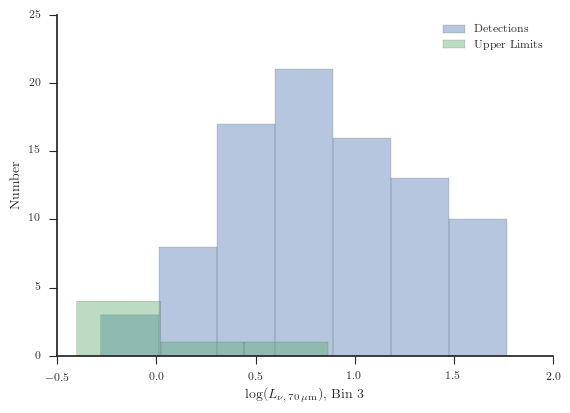

In [9]:
f = sed.loc[bin_3, 'LPACS70'].values
ferr = sed.loc[bin_3, 'LPACS70_err'].values
ul = f == 0
sn.distplot(np.log10(f[~ul]), kde=False)
sn.distplot(np.log10(ferr[ul]), kde=False)
sn.despine()
plt.xlabel(r'$\log$($L_{\nu,\,70\,\mu\rm{m}}$), Bin 3')
plt.ylabel('Number')
plt.legend(['Detections', 'Upper Limits'])
plt.savefig('/Users/ttshimiz/Github/bat-agn-sed-fitting-paper/figures/l70_dist_bin3.png', bbox_inches='tight')
ks_test = stats.ks_2samp(np.log10(f[~ul]), np.log10(ferr[ul]))
print 'KS Probability =',ks_test[1]*100

KS Probability = 0.0841050229384


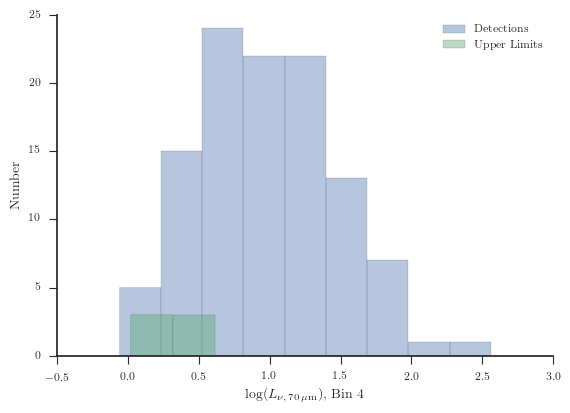

In [10]:
f = sed.loc[bin_4, 'LPACS70'].values
ferr = sed.loc[bin_4, 'LPACS70_err'].values
ul = f == 0
sn.distplot(np.log10(f[~ul]), kde=False)
sn.distplot(np.log10(ferr[ul]), kde=False)
sn.despine()
plt.xlabel(r'$\log$($L_{\nu,\,70\,\mu\rm{m}}$), Bin 4')
plt.ylabel('Number')
plt.legend(['Detections', 'Upper Limits'])
plt.savefig('/Users/ttshimiz/Github/bat-agn-sed-fitting-paper/figures/l70_dist_bin4.png', bbox_inches='tight')
ks_test = stats.ks_2samp(np.log10(f[~ul]), np.log10(ferr[ul]))
print 'KS Probability =',ks_test[1]*100

KS Probability = 6.59690452762


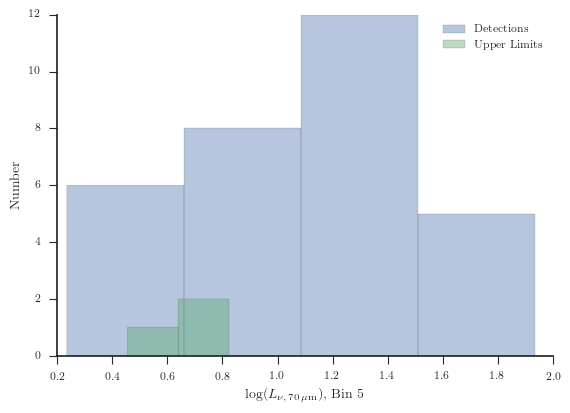

In [11]:
f = sed.loc[bin_5, 'LPACS70'].values
ferr = sed.loc[bin_5, 'LPACS70_err'].values
ul = f == 0
sn.distplot(np.log10(f[~ul]), kde=False)
sn.distplot(np.log10(ferr[ul]), kde=False)
sn.despine()
plt.xlabel(r'$\log$($L_{\nu,\,70\,\mu\rm{m}}$), Bin 5')
plt.ylabel('Number')
plt.legend(['Detections', 'Upper Limits'])
plt.savefig('/Users/ttshimiz/Github/bat-agn-sed-fitting-paper/figures/l70_dist_bin5.png', bbox_inches='tight')
ks_test = stats.ks_2samp(np.log10(f[~ul]), np.log10(ferr[ul]))
print 'KS Probability =',ks_test[1]*100

KS Probability = 1.24801545954


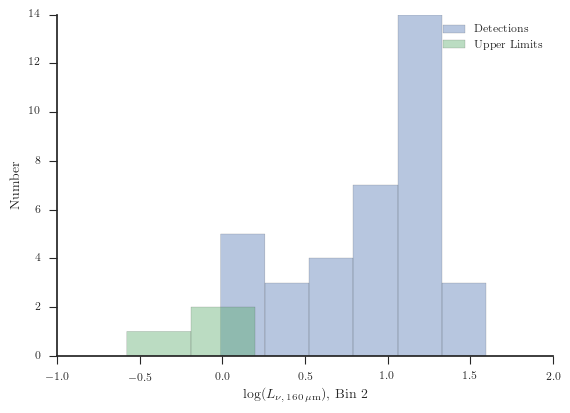

In [12]:
f = sed.loc[bin_2, 'LPACS160'].values
ferr = sed.loc[bin_2, 'LPACS160_err'].values
ul = f == 0
sn.distplot(np.log10(f[~ul]), kde=False)
sn.distplot(np.log10(ferr[ul]), kde=False)
sn.despine()
plt.xlabel(r'$\log$($L_{\nu,\,160\,\mu\rm{m}}$), Bin 2')
plt.ylabel('Number')
plt.legend(['Detections', 'Upper Limits'])
plt.savefig('/Users/ttshimiz/Github/bat-agn-sed-fitting-paper/figures/l160_dist_bin2.png', bbox_inches='tight')
ks_test = stats.ks_2samp(np.log10(f[~ul]), np.log10(ferr[ul]))
print 'KS Probability =',ks_test[1]*100

KS Probability = 0.00015686726496


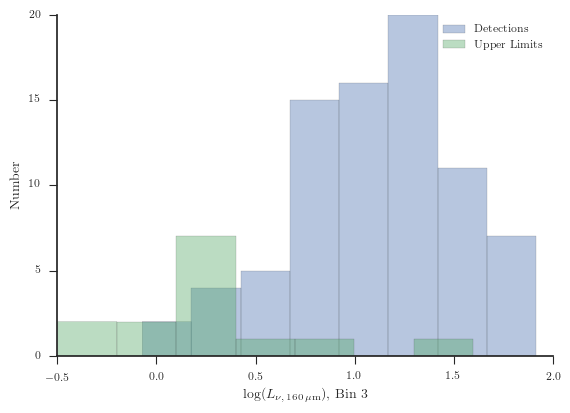

In [13]:
f = sed.loc[bin_3, 'LPACS160'].values
ferr = sed.loc[bin_3, 'LPACS160_err'].values
ul = f == 0
sn.distplot(np.log10(f[~ul]), kde=False)
sn.distplot(np.log10(ferr[ul]), kde=False)
sn.despine()
plt.xlabel(r'$\log$($L_{\nu,\,160\,\mu\rm{m}}$), Bin 3')
plt.ylabel('Number')
plt.legend(['Detections', 'Upper Limits'])
plt.savefig('/Users/ttshimiz/Github/bat-agn-sed-fitting-paper/figures/l160_dist_bin3.png', bbox_inches='tight')
ks_test = stats.ks_2samp(np.log10(f[~ul]), np.log10(ferr[ul]))
print 'KS Probability =',ks_test[1]*100

KS Probability = 3.47657763182e-08


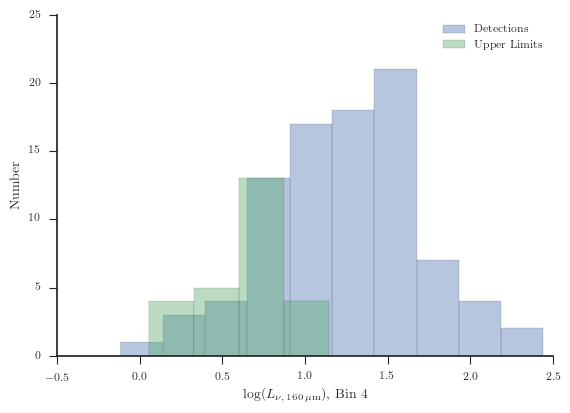

In [14]:
f = sed.loc[bin_4, 'LPACS160'].values
ferr = sed.loc[bin_4, 'LPACS160_err'].values
ul = f == 0
sn.distplot(np.log10(f[~ul]), kde=False)
sn.distplot(np.log10(ferr[ul]), kde=False)
sn.despine()
plt.xlabel(r'$\log$($L_{\nu,\,160\,\mu\rm{m}}$), Bin 4')
plt.ylabel('Number')
plt.legend(['Detections', 'Upper Limits'])
plt.savefig('/Users/ttshimiz/Github/bat-agn-sed-fitting-paper/figures/l160_dist_bin4.png', bbox_inches='tight')
ks_test = stats.ks_2samp(np.log10(f[~ul]), np.log10(ferr[ul]))
print 'KS Probability =',ks_test[1]*100

KS Probability = 0.367150628497


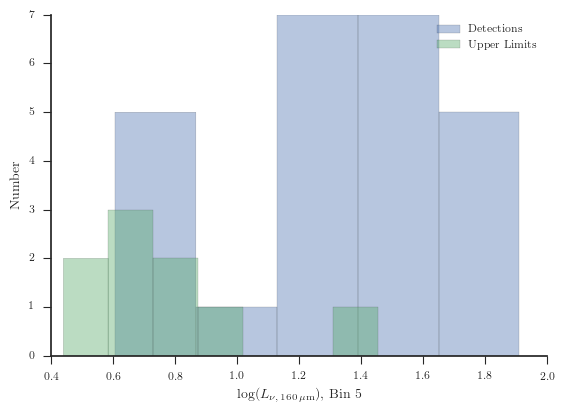

In [15]:
f = sed.loc[bin_5, 'LPACS160'].values
ferr = sed.loc[bin_5, 'LPACS160_err'].values
ul = f == 0
sn.distplot(np.log10(f[~ul]), kde=False)
sn.distplot(np.log10(ferr[ul]), kde=False)
sn.despine()
plt.xlabel(r'$\log$($L_{\nu,\,160\,\mu\rm{m}}$), Bin 5')
plt.ylabel('Number')
plt.legend(['Detections', 'Upper Limits'])
plt.savefig('/Users/ttshimiz/Github/bat-agn-sed-fitting-paper/figures/l160_dist_bin5.png', bbox_inches='tight')
ks_test = stats.ks_2samp(np.log10(f[~ul]), np.log10(ferr[ul]))
print 'KS Probability =',ks_test[1]*100

KS Probability = 1.24801545954


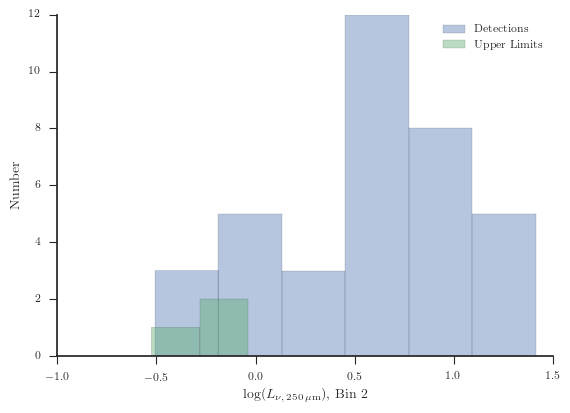

In [16]:
f = sed.loc[bin_2, 'LPSW'].values
ferr = sed.loc[bin_2, 'LPSW_err'].values
ul = f == 0
sn.distplot(np.log10(f[~ul]), kde=False)
sn.distplot(np.log10(ferr[ul]), kde=False)
sn.despine()
plt.xlabel(r'$\log$($L_{\nu,\,250\,\mu\rm{m}}$), Bin 2')
plt.ylabel('Number')
plt.legend(['Detections', 'Upper Limits'])
plt.savefig('/Users/ttshimiz/Github/bat-agn-sed-fitting-paper/figures/l250_dist_bin2.png', bbox_inches='tight')
ks_test = stats.ks_2samp(np.log10(f[~ul]), np.log10(ferr[ul]))
print 'KS Probability =',ks_test[1]*100

KS Probability = 9.87411452677


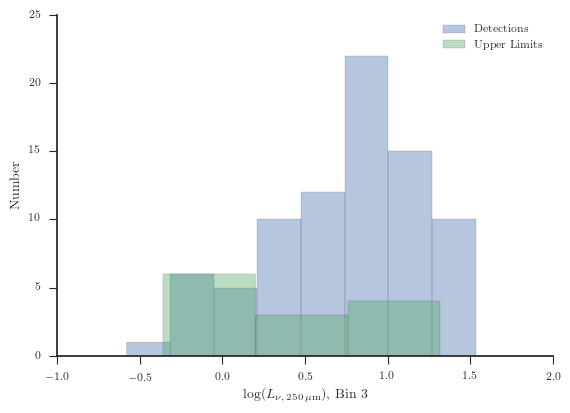

In [17]:
f = sed.loc[bin_3, 'LPSW'].values
ferr = sed.loc[bin_3, 'LPSW_err'].values
ul = f == 0
sn.distplot(np.log10(f[~ul]), kde=False)
sn.distplot(np.log10(ferr[ul]), kde=False)
sn.despine()
plt.xlabel(r'$\log$($L_{\nu,\,250\,\mu\rm{m}}$), Bin 3')
plt.ylabel('Number')
plt.legend(['Detections', 'Upper Limits'])
plt.savefig('/Users/ttshimiz/Github/bat-agn-sed-fitting-paper/figures/l250_dist_bin3.png', bbox_inches='tight')
ks_test = stats.ks_2samp(np.log10(f[~ul]), np.log10(ferr[ul]))
print 'KS Probability =',ks_test[1]*100

KS Probability = 11.0957645573


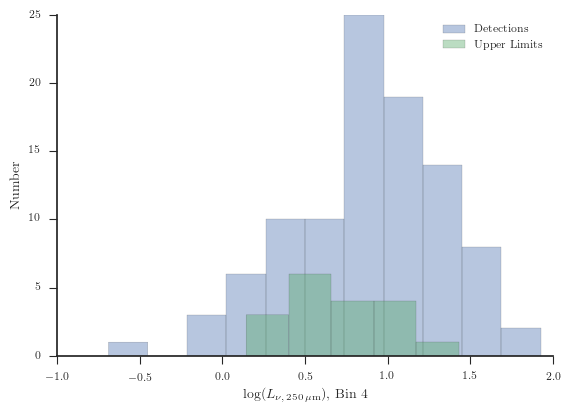

In [18]:
f = sed.loc[bin_4, 'LPSW'].values
ferr = sed.loc[bin_4, 'LPSW_err'].values
ul = f == 0
sn.distplot(np.log10(f[~ul]), kde=False)
sn.distplot(np.log10(ferr[ul]), kde=False)
sn.despine()
plt.xlabel(r'$\log$($L_{\nu,\,250\,\mu\rm{m}}$), Bin 4')
plt.ylabel('Number')
plt.legend(['Detections', 'Upper Limits'])
plt.savefig('/Users/ttshimiz/Github/bat-agn-sed-fitting-paper/figures/l250_dist_bin4.png', bbox_inches='tight')
ks_test = stats.ks_2samp(np.log10(f[~ul]), np.log10(ferr[ul]))
print 'KS Probability =',ks_test[1]*100

KS Probability = 30.0617493863


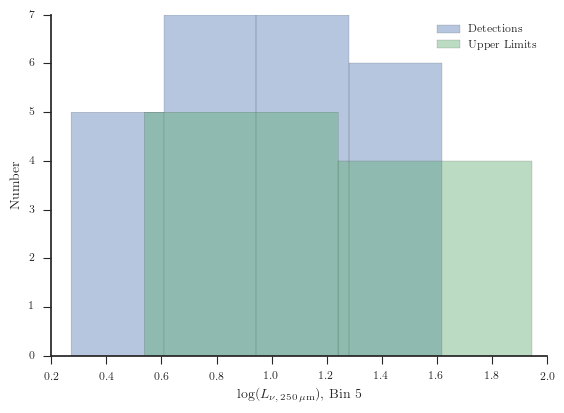

In [19]:
f = sed.loc[bin_5, 'LPSW'].values
ferr = sed.loc[bin_5, 'LPSW_err'].values
ul = f == 0
sn.distplot(np.log10(f[~ul]), kde=False)
sn.distplot(np.log10(ferr[ul]), kde=False)
sn.despine()
plt.xlabel(r'$\log$($L_{\nu,\,250\,\mu\rm{m}}$), Bin 5')
plt.ylabel('Number')
plt.legend(['Detections', 'Upper Limits'])
plt.savefig('/Users/ttshimiz/Github/bat-agn-sed-fitting-paper/figures/l250_dist_bin5.png', bbox_inches='tight')
ks_test = stats.ks_2samp(np.log10(f[~ul]), np.log10(ferr[ul]))
print 'KS Probability =',ks_test[1]*100

KS Probability = 6.2770652597


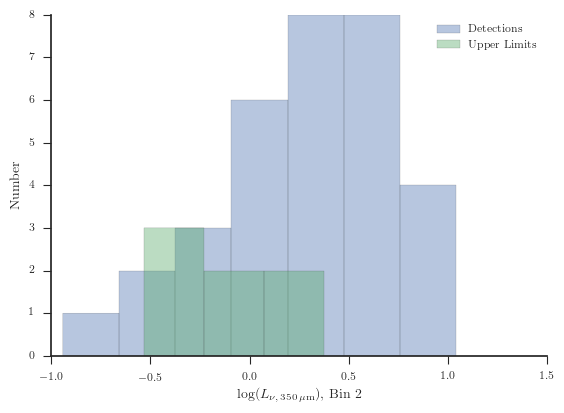

In [21]:
f = sed.loc[bin_2, 'LPMW'].values
ferr = sed.loc[bin_2, 'LPMW_err'].values
ul = f == 0
sn.distplot(np.log10(f[~ul]), kde=False)
sn.distplot(np.log10(ferr[ul]), kde=False)
sn.despine()
plt.xlabel(r'$\log$($L_{\nu,\,350\,\mu\rm{m}}$), Bin 2')
plt.ylabel('Number')
plt.legend(['Detections', 'Upper Limits'])
plt.savefig('/Users/ttshimiz/Github/bat-agn-sed-fitting-paper/figures/l350_dist_bin2.png', bbox_inches='tight')
ks_test = stats.ks_2samp(np.log10(f[~ul]), np.log10(ferr[ul]))
print 'KS Probability =',ks_test[1]*100

KS Probability = 0.698903791516


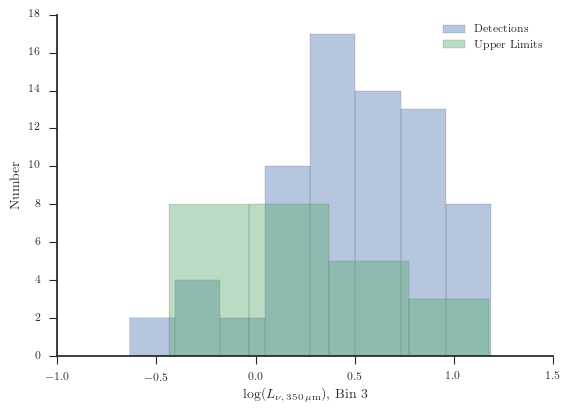

In [22]:
f = sed.loc[bin_3, 'LPMW'].values
ferr = sed.loc[bin_3, 'LPMW_err'].values
ul = f == 0
sn.distplot(np.log10(f[~ul]), kde=False)
sn.distplot(np.log10(ferr[ul]), kde=False)
sn.despine()
plt.xlabel(r'$\log$($L_{\nu,\,350\,\mu\rm{m}}$), Bin 3')
plt.ylabel('Number')
plt.legend(['Detections', 'Upper Limits'])
plt.savefig('/Users/ttshimiz/Github/bat-agn-sed-fitting-paper/figures/l350_dist_bin3.png', bbox_inches='tight')
ks_test = stats.ks_2samp(np.log10(f[~ul]), np.log10(ferr[ul]))
print 'KS Probability =',ks_test[1]*100

KS Probability = 13.6768758753


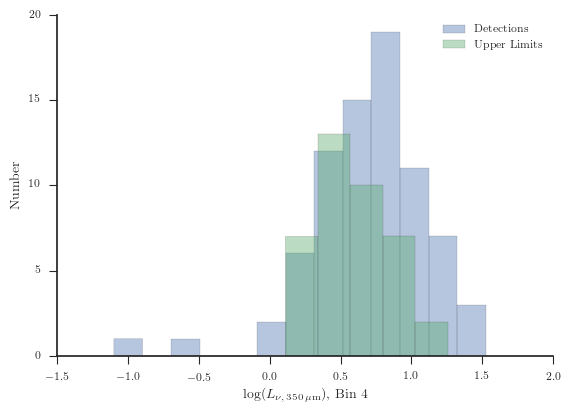

In [23]:
f = sed.loc[bin_4, 'LPMW'].values
ferr = sed.loc[bin_4, 'LPMW_err'].values
ul = f == 0
sn.distplot(np.log10(f[~ul]), kde=False)
sn.distplot(np.log10(ferr[ul]), kde=False)
sn.despine()
plt.xlabel(r'$\log$($L_{\nu,\,350\,\mu\rm{m}}$), Bin 4')
plt.ylabel('Number')
plt.legend(['Detections', 'Upper Limits'])
plt.savefig('/Users/ttshimiz/Github/bat-agn-sed-fitting-paper/figures/l350_dist_bin4.png', bbox_inches='tight')
ks_test = stats.ks_2samp(np.log10(f[~ul]), np.log10(ferr[ul]))
print 'KS Probability =',ks_test[1]*100

KS Probability = 39.9813202872


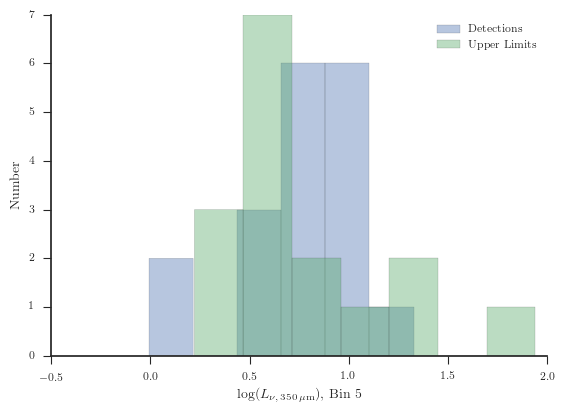

In [24]:
f = sed.loc[bin_5, 'LPMW'].values
ferr = sed.loc[bin_5, 'LPMW_err'].values
ul = f == 0
sn.distplot(np.log10(f[~ul]), kde=False)
sn.distplot(np.log10(ferr[ul]), kde=False)
sn.despine()
plt.xlabel(r'$\log$($L_{\nu,\,350\,\mu\rm{m}}$), Bin 5')
plt.ylabel('Number')
plt.legend(['Detections', 'Upper Limits'])
plt.savefig('/Users/ttshimiz/Github/bat-agn-sed-fitting-paper/figures/l350_dist_bin5.png', bbox_inches='tight')
ks_test = stats.ks_2samp(np.log10(f[~ul]), np.log10(ferr[ul]))
print 'KS Probability =',ks_test[1]*100

KS Probability = 0.56494503243


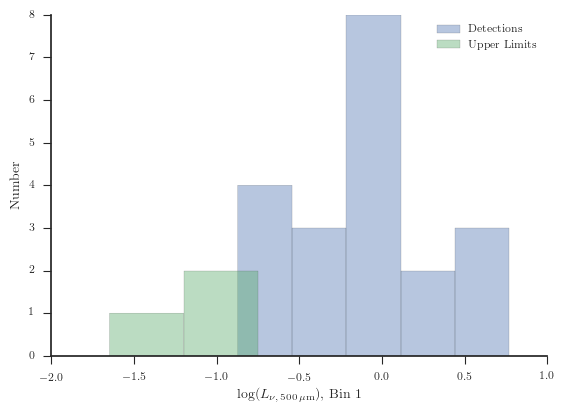

In [25]:
f = sed.loc[bin_1, 'LPLW'].values
ferr = sed.loc[bin_1, 'LPLW_err'].values
ul = f == 0
sn.distplot(np.log10(f[~ul]), kde=False)
sn.distplot(np.log10(ferr[ul]), kde=False)
sn.despine()
plt.xlabel(r'$\log$($L_{\nu,\,500\,\mu\rm{m}}$), Bin 1')
plt.ylabel('Number')
plt.legend(['Detections', 'Upper Limits'])
plt.savefig('/Users/ttshimiz/Github/bat-agn-sed-fitting-paper/figures/l500_dist_bin1.png', bbox_inches='tight')
ks_test = stats.ks_2samp(np.log10(f[~ul]), np.log10(ferr[ul]))
print 'KS Probability =',ks_test[1]*100

KS Probability = 26.7172085065


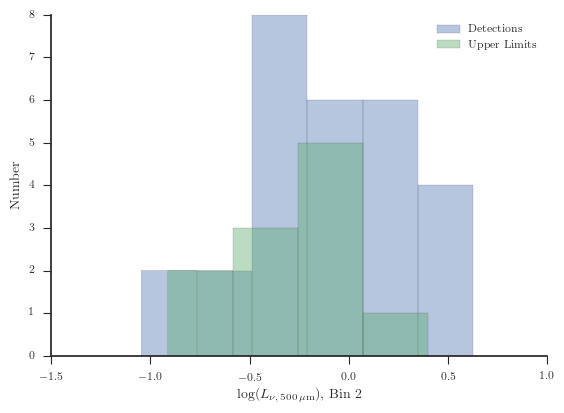

In [26]:
f = sed.loc[bin_2, 'LPLW'].values
ferr = sed.loc[bin_2, 'LPLW_err'].values
ul = f == 0
sn.distplot(np.log10(f[~ul]), kde=False)
sn.distplot(np.log10(ferr[ul]), kde=False)
sn.despine()
plt.xlabel(r'$\log$($L_{\nu,\,500\,\mu\rm{m}}$), Bin 2')
plt.ylabel('Number')
plt.legend(['Detections', 'Upper Limits'])
plt.savefig('/Users/ttshimiz/Github/bat-agn-sed-fitting-paper/figures/l500_dist_bin2.png', bbox_inches='tight')
ks_test = stats.ks_2samp(np.log10(f[~ul]), np.log10(ferr[ul]))
print 'KS Probability =',ks_test[1]*100

KS Probability = 19.8862314742


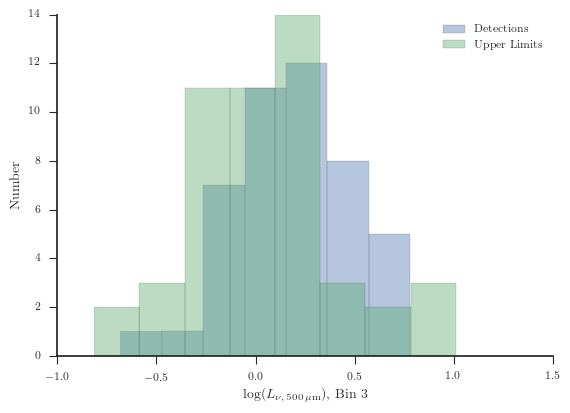

In [27]:
f = sed.loc[bin_3, 'LPLW'].values
ferr = sed.loc[bin_3, 'LPLW_err'].values
ul = f == 0
sn.distplot(np.log10(f[~ul]), kde=False)
sn.distplot(np.log10(ferr[ul]), kde=False)
sn.despine()
plt.xlabel(r'$\log$($L_{\nu,\,500\,\mu\rm{m}}$), Bin 3')
plt.ylabel('Number')
plt.legend(['Detections', 'Upper Limits'])
plt.savefig('/Users/ttshimiz/Github/bat-agn-sed-fitting-paper/figures/l500_dist_bin3.png', bbox_inches='tight')
ks_test = stats.ks_2samp(np.log10(f[~ul]), np.log10(ferr[ul]))
print 'KS Probability =',ks_test[1]*100

KS Probability = 62.6318618184


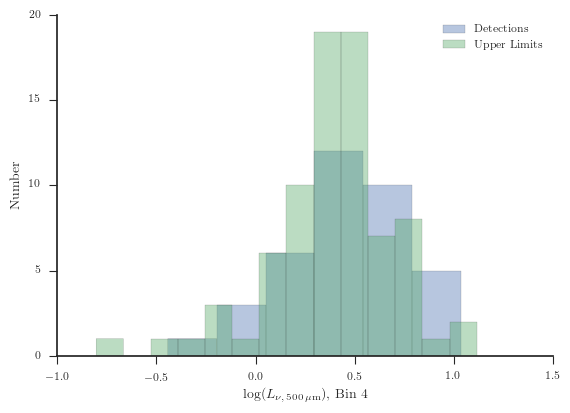

In [28]:
f = sed.loc[bin_4, 'LPLW'].values
ferr = sed.loc[bin_4, 'LPLW_err'].values
ul = f == 0
sn.distplot(np.log10(f[~ul]), kde=False)
sn.distplot(np.log10(ferr[ul]), kde=False)
sn.despine()
plt.xlabel(r'$\log$($L_{\nu,\,500\,\mu\rm{m}}$), Bin 4')
plt.ylabel('Number')
plt.legend(['Detections', 'Upper Limits'])
plt.savefig('/Users/ttshimiz/Github/bat-agn-sed-fitting-paper/figures/l500_dist_bin4.png', bbox_inches='tight')
ks_test = stats.ks_2samp(np.log10(f[~ul]), np.log10(ferr[ul]))
print 'KS Probability =',ks_test[1]*100

KS Probability = 27.3427167181


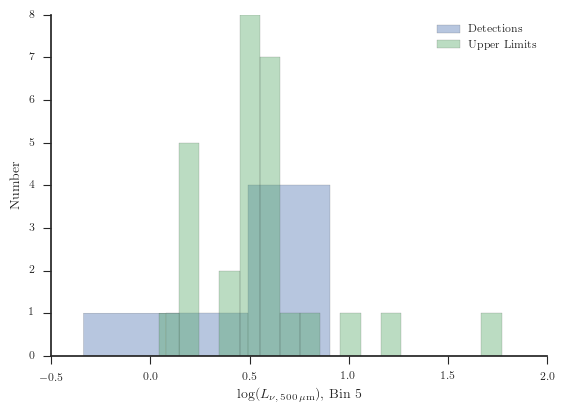

In [29]:
f = sed.loc[bin_5, 'LPLW'].values
ferr = sed.loc[bin_5, 'LPLW_err'].values
ul = f == 0
sn.distplot(np.log10(f[~ul]), kde=False)
sn.distplot(np.log10(ferr[ul]), kde=False)
sn.despine()
plt.xlabel(r'$\log$($L_{\nu,\,500\,\mu\rm{m}}$), Bin 5')
plt.ylabel('Number')
plt.legend(['Detections', 'Upper Limits'])
plt.savefig('/Users/ttshimiz/Github/bat-agn-sed-fitting-paper/figures/l500_dist_bin5.png', bbox_inches='tight')
ks_test = stats.ks_2samp(np.log10(f[~ul]), np.log10(ferr[ul]))
print 'KS Probability =',ks_test[1]*100